In [72]:
import pandas as pd
import os
import numpy as np
import school_analysis as sa
import re
from datetime import datetime

path=os.path.join(sa.PROJECT_PATH, "data", "genesis","graduates.csv")
df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=7, skipfooter=4, engine="python", index_col=None, header=None)
df.replace("b'", "", inplace=True, regex=True)
df.replace("'", "", inplace=True, regex=True)

df 

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,,NaN,2015/16,NaN,NaN,2016/17,NaN,NaN,2017/18,NaN,...,NaN,2019/20,NaN,NaN,2020/21,NaN,NaN,2021/22,NaN,
1,,NaN,Sex,NaN,NaN,Sex,NaN,NaN,Sex,NaN,...,NaN,Sex,NaN,NaN,Sex,NaN,NaN,Sex,NaN,
2,,NaN,Male,Female,Total,Male,Female,Total,Male,Female,...,Total,Male,Female,Total,Male,Female,Total,Male,Female,Total
3,Baden-W\xc3\xbcrttemberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,Secondary general schools,Without secondary general school certificate,1003,636,1639,1202,681,1883,997,591,...,993,406,282,688,534,307,841,608,412,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,of entrance qualification for universities of ...,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1367,sciences.,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1368,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1369,Grammar schools (9 years of schooling):,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [73]:
def parse_and_convert_years(strings):
    valid_dates = []
    pattern = r"^(\d{4})/\d{2}$"

    for s in strings:
        if not isinstance(s, str):
            continue
        match = re.match(pattern, s)
        if match:
            year = match.group(1)
            date_str = f"{year}-01-01"
            valid_dates.append(datetime.strptime(date_str, "%Y-%m-%d"))

    return valid_dates


years = parse_and_convert_years(list(df.iloc[0,:]))
total_students_without_graduates = []

for i in range(0,len(years)+0):
    x = df.iloc[:,4+3*i:5+3*i]
    total_sum = x.apply(pd.to_numeric, errors='coerce').sum().sum()
    total_students_without_graduates.append(total_sum)
   

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

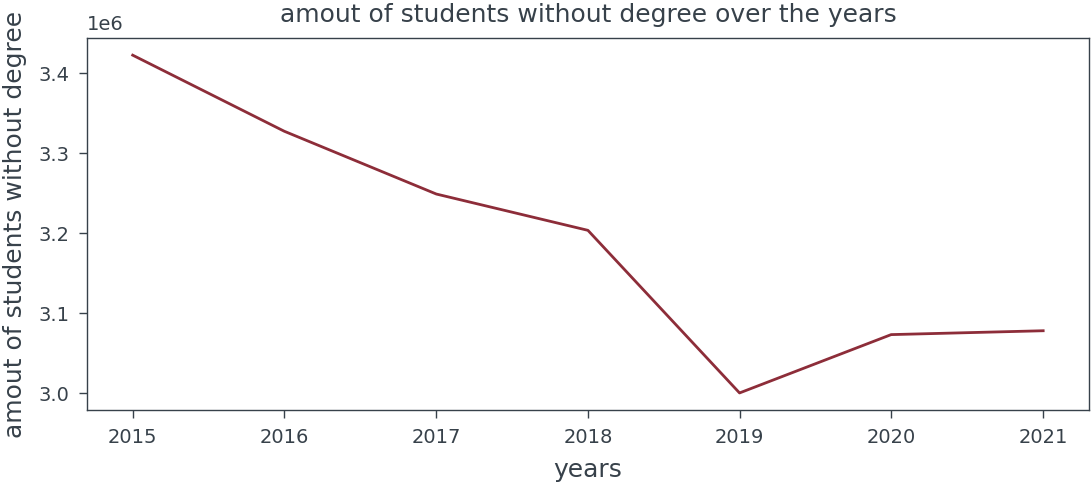

In [74]:
import matplotlib.pyplot as plt
plt.plot(years, total_students_without_graduates)
plt.xlabel('years')
plt.ylabel('amout of students without degree')
plt.title('amout of students without degree over the years')
plt.show()